<a href="https://colab.research.google.com/github/ozgucbertug/latentHeuristics/blob/main/notebooks/tSNE_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas
import numpy as np

import matplotlib.pyplot as plt

import sklearn.manifold
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
# read the data
data = pandas.read_csv("https://raw.githubusercontent.com/ozgucbertug/latentHeuristics/main/out/csv/custom_multi_all_latent_vectors.csv", header=None);
labels = pandas.read_csv("https://raw.githubusercontent.com/ozgucbertug/latentHeuristics/main/out/csv/custom_multi_all_labels.csv", header=None);

In [12]:
colors = []
for label in labels.values:
  label = label[0]
  if "simple" in label:
    colors.append(0)
  elif "asymmetric" in label:
    colors.append(1)
  elif "spiral" in label:
    colors.append(2)
  elif "lowPoly" in label:
    colors.append(3)

In [13]:
# since the variables are of incomparable units, standardize the data for t-SNE with mean=0 std=1
scaler = StandardScaler()
scaler.fit(data.values)
X = scaler.transform(data.values)

In [14]:
# initiate the t-SNE model and fit the standardized data
X_TSNE = sklearn.manifold.TSNE(n_components=2).fit_transform(X)

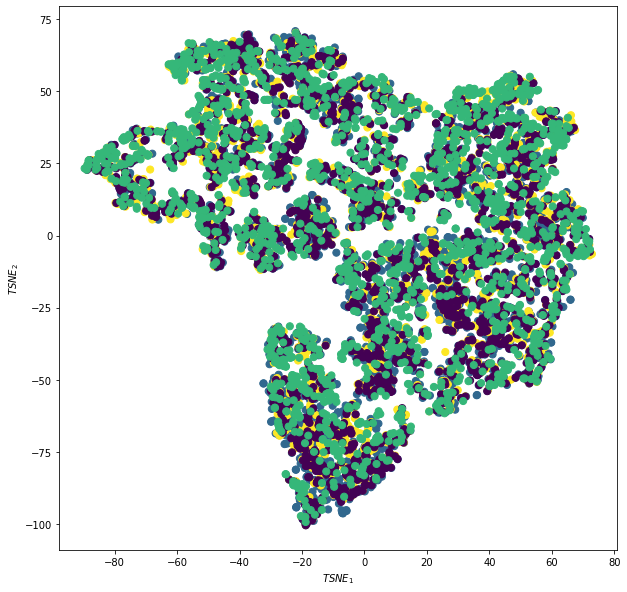

In [17]:
# plot the output of t-SNE with colored clusters and cluster centroids
plt.figure(figsize=(10, 10))
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=colors, s=50, cmap='viridis')
plt.xlabel("$TSNE_1$")
plt.ylabel("$TSNE_2$")
plt.show()